# IPCV Experiment-12

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("buildings.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Displayed Image",image)

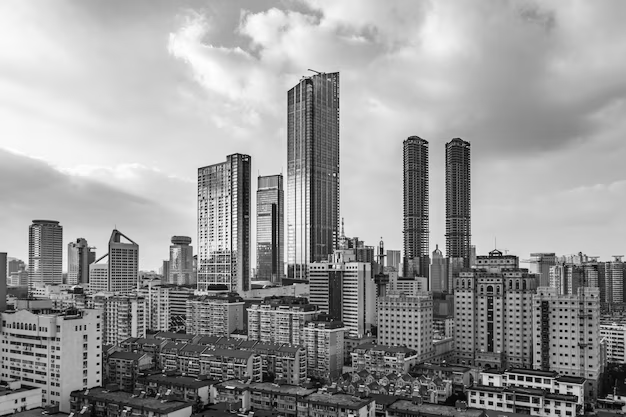

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (417, 626)
Datatype of image:  uint8
Channels of image:  2
Total number of pixels (Size of image): 261042


## Laplacian

In [ ]:
laplacian_mask = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
print(laplacian_mask)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [ ]:
laplacian_image = np.zeros(image.shape, dtype=np.uint8)

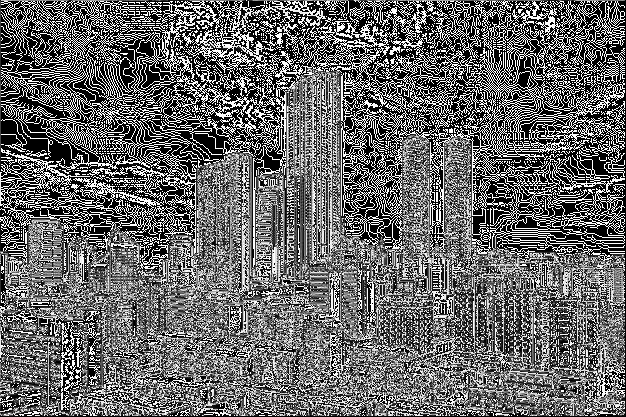

In [ ]:

for i in range(0, image.shape[0]-1):
  for j in range(0, image.shape[1]-1):
    laplacian_image[i,j] = image[i-1,j-1]*laplacian_mask[0,0] + image[i-1,j]*laplacian_mask[0,1] + image[i-1,j+1]*laplacian_mask[0,2] + image[i,j-1]*laplacian_mask[1,0] + image[i,j]*laplacian_mask[1,1] + image[i,j+1]*laplacian_mask[1,2] + image[i+1,j-1]*laplacian_mask[2,0] + image[i+1,j]*laplacian_mask[2,1] + image[i+1,j+1]*laplacian_mask[2,2]

cv2_imshow(laplacian_image)

## Laplacian of Gaussian (LoG)

#### 1. Gaussian then Laplacian

In [ ]:
laplacian_of_gaussian_image = np.zeros(image.shape, dtype=np.uint8)

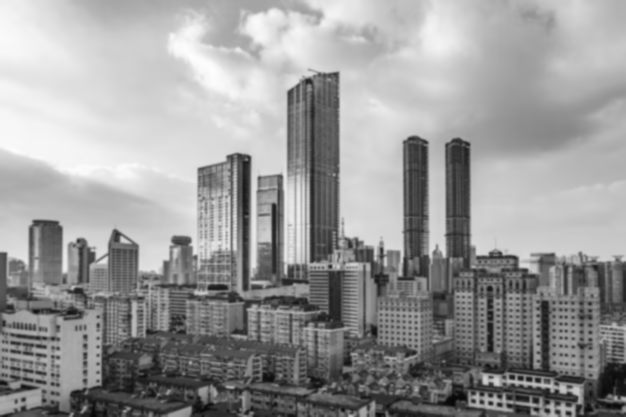

In [ ]:
gaussian_image = cv2.GaussianBlur(image, (5, 5), 1)
cv2_imshow(gaussian_image)

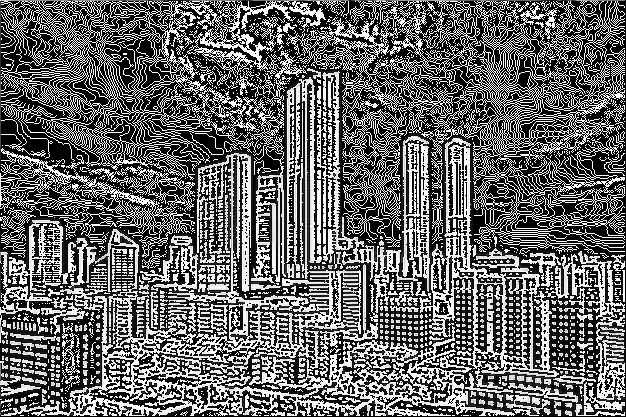

In [ ]:
for i in range(0, gaussian_image.shape[0]-1):
  for j in range(0, gaussian_image.shape[1]-1):
    laplacian_of_gaussian_image[i,j] = gaussian_image[i-1,j-1]*laplacian_mask[0,0] + gaussian_image[i-1,j]*laplacian_mask[0,1] + gaussian_image[i-1,j+1]*laplacian_mask[0,2] + gaussian_image[i,j-1]*laplacian_mask[1,0] + gaussian_image[i,j]*laplacian_mask[1,1] + gaussian_image[i,j+1]*laplacian_mask[1,2] + gaussian_image[i+1,j-1]*laplacian_mask[2,0] + gaussian_image[i+1,j]*laplacian_mask[2,1] + gaussian_image[i+1,j+1]*laplacian_mask[2,2]

cv2_imshow(laplacian_of_gaussian_image)

#### 2. LoG Mask

In [ ]:
log_image = np.zeros(image.shape, dtype=np.uint8)

In [ ]:
log_mask = np.array([[0, 0, -1, 0, 0],[0, -1, -2, -1, 0],[-1, -2, 16, -2, -1],[0, -1, -2, -1, 0],[0, 0, -1, 0, 0]])
print(log_mask)

[[ 0  0 -1  0  0]
 [ 0 -1 -2 -1  0]
 [-1 -2 16 -2 -1]
 [ 0 -1 -2 -1  0]
 [ 0  0 -1  0  0]]


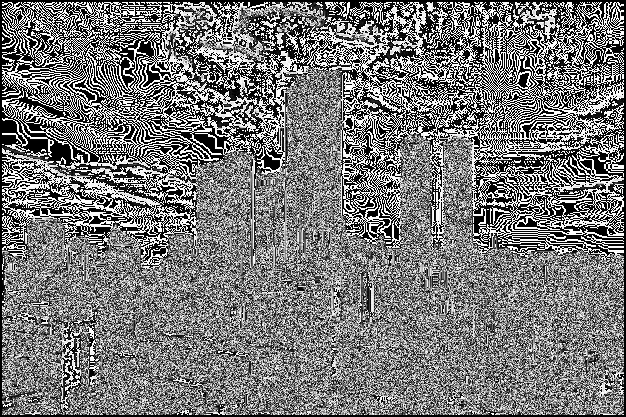

In [ ]:
for i in range(2, image.shape[0]-2):
  for j in range(2, image.shape[1]-2):
    log_image[i,j] = image[i-2,j-2]*log_mask[0,0] + image[i-2,j-1]*log_mask[0,1] + image[i-2,j]*log_mask[0,2] + image[i-2,j+1]*log_mask[0,3] + image[i-2,j+2]*log_mask[0,4] + image[i-1,j-2]*log_mask[1,0] + image[i-1,j-1]*log_mask[1,1] + image[i-1,j]*log_mask[1,2] + image[i-1,j+1]*log_mask[1,3] + image[i-1,j+2]*log_mask[1,4] + image[i,j-2]*log_mask[2,0] + image[i,j-1]*log_mask[2,1] + image[i,j]*log_mask[2,2] + image[i,j+1]*log_mask[2,3] + image[i,j+2]*log_mask[2,4] + image[i+1,j-2]*log_mask[3,0] + image[i+1,j-1]*log_mask[3,1] + image[i+1,j]*log_mask[3,2] + image[i+1,j+1]*log_mask[3,3] + image[i+1,j+2]*log_mask[3,4] + image[i+2,j-2]*log_mask[4,0] + image[i+2,j-1]*log_mask[4,1] + image[i+2,j]*log_mask[4,2] + image[i+2,j+1]*log_mask[4,3] + image[i+2,j+2]*log_mask[4,4]

cv2_imshow(log_image)

## Canny-Edge Detection

#### 1. Direct Function

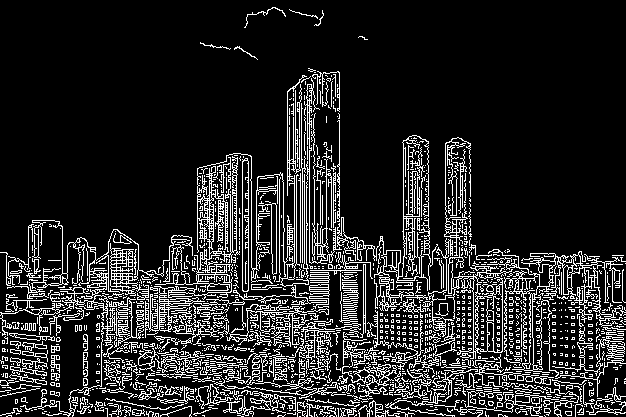

In [ ]:
canny_image = cv2.Canny(image, 100, 200)
cv2_imshow(canny_image)

#### 2. Using Steps

Gaussian Blurred Image:



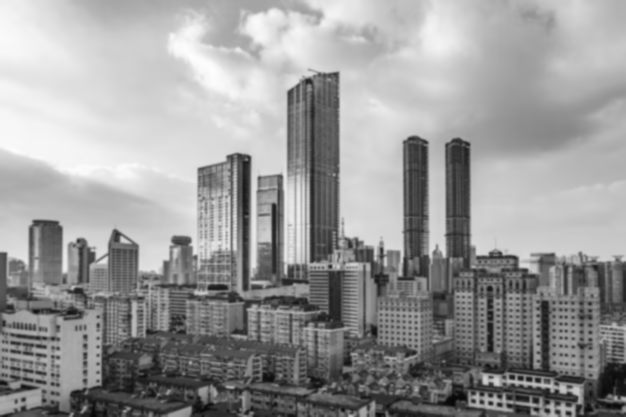

In [ ]:
gaussian_image = cv2.GaussianBlur(image, (5, 5), 1)
print("Gaussian Blurred Image:\n")
cv2_imshow(gaussian_image)

In [ ]:
sobelx = cv2.Sobel(gaussian_image_step, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gaussian_image_step, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_direction = np.arctan2(sobely, sobelx) * 180 / np.pi

angle = gradient_direction
angle[angle < 0] += 180

Non-Maximum Suppressed Image:


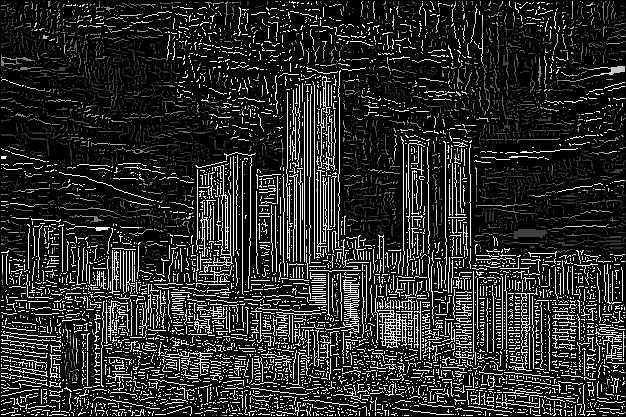

In [ ]:
suppressed_image = np.zeros_like(gradient_magnitude)

for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        q = 255
        r = 255

        if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
            q = gradient_magnitude[i, j+1]
            r = gradient_magnitude[i, j-1]
        elif (22.5 <= angle[i, j] < 67.5):
            q = gradient_magnitude[i+1, j-1]
            r = gradient_magnitude[i-1, j+1]
        elif (67.5 <= angle[i, j] < 112.5):
            q = gradient_magnitude[i+1, j]
            r = gradient_magnitude[i-1, j]
        elif (112.5 <= angle[i, j] < 157.5):
            q = gradient_magnitude[i-1, j-1]
            r = gradient_magnitude[i+1, j+1]

        if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
            suppressed_image[i, j] = gradient_magnitude[i, j]

print("Non-Maximum Suppressed Image:")
cv2_imshow(suppressed_image)


Strong Edges:


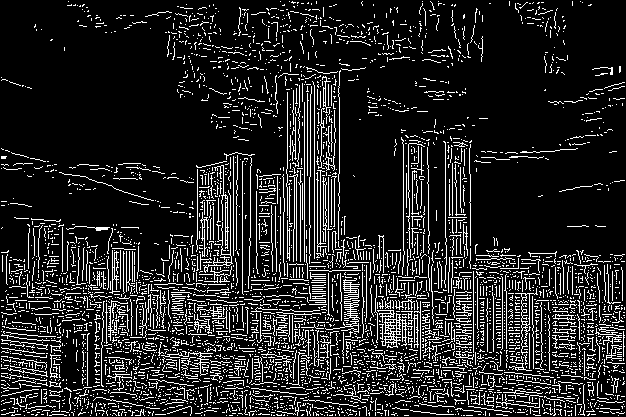


Weak Edges:


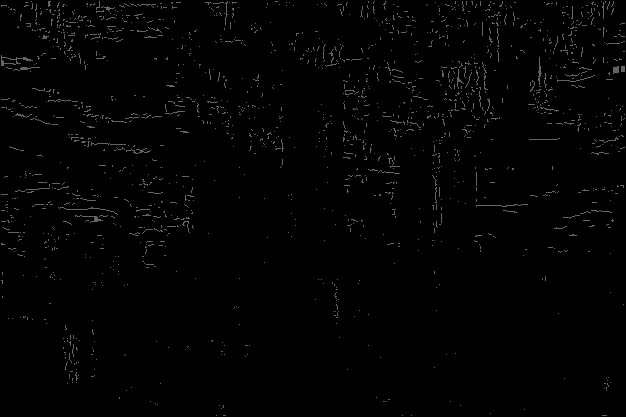

In [ ]:
low_threshold = 100
high_threshold = 200

strong_edges = np.zeros_like(suppressed_image)
weak_edges = np.zeros_like(suppressed_image)

strong_edges[suppressed_image > high_threshold] = 255
weak_edges[(suppressed_image <= high_threshold) & (suppressed_image >= low_threshold)] = low_threshold

print("\nStrong Edges:")
cv2_imshow(strong_edges)
print("\nWeak Edges:")
cv2_imshow(weak_edges)

In [ ]:
canny_edged_image = strong_edges.copy()

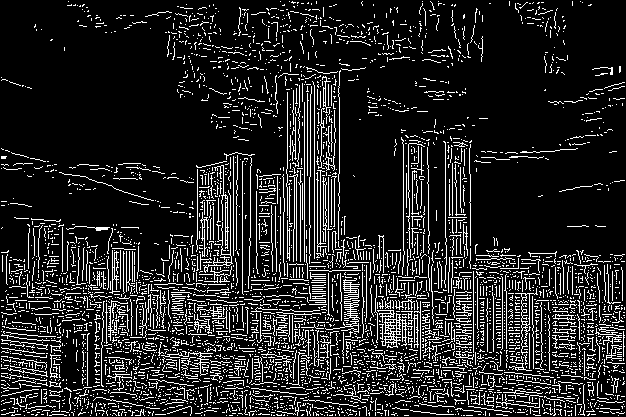

In [ ]:
def edge_tracking(i, j):
    if weak_edges[i, j] == low_threshold:
        if ((canny_edged_image[i+1, j-1] == 255) or (canny_edged_image[i+1, j] == 255) or (canny_edged_image[i+1, j+1] == 255)
            or (canny_edged_image[i, j-1] == 255) or (canny_edged_image[i, j+1] == 255)
            or (canny_edged_image[i-1, j-1] == 255) or (canny_edged_image[i-1, j] == 255) or (canny_edged_image[i-1, j+1] == 255)):
            canny_edged_image[i, j] = 255

            for x, y in [(1, -1), (1, 0), (1, 1), (0, -1), (0, 1), (-1, -1), (-1, 0), (-1, 1)]:
                if 0 <= i + x < image.shape[0] and 0 <= j + y < image.shape[1]:
                     edge_tracking(i + x, j + y)

for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        if strong_edges[i, j] == 255:
            edge_tracking(i, j)

cv2_imshow(canny_edged_image)